# Exploring a curated multi-image classification dataset in fastai
- Walkthrough of how to train a model that classifies multiple objects in the same image
- This notebook is inspired by this Kaggle kernel: https://www.kaggle.com/jachen36/coco-tiny-test-prediction


In [1]:
# imports for notebook boilerplate
!pip install -Uqq fastbook
import fastbook
import os
from fastbook import *
from fastai.vision.all import *

In [2]:
# set up the notebook for fast.ai
fastbook.setup_book()

# Ingest the dataset

In [3]:
path = untar_data(URLs.PASCAL_2007)

In [4]:
path.ls()

(#8) [Path('/storage/data/pascal_2007/train'),Path('/storage/data/pascal_2007/test.json'),Path('/storage/data/pascal_2007/segmentation'),Path('/storage/data/pascal_2007/train.json'),Path('/storage/data/pascal_2007/valid.json'),Path('/storage/data/pascal_2007/test.csv'),Path('/storage/data/pascal_2007/train.csv'),Path('/storage/data/pascal_2007/test')]

# Examine the dataset

In [5]:
# bring the structures in the train.json file into Python
with open(path/'train.json') as json_file:
    data = json.load(json_file)
    # each nested structure is a list of dictionaries
    categories = data['categories']
    images = data['images']
    annotations = data['annotations']  
   

In [6]:
print("categories ", categories)
print()
print("subset of images",list(images)[:5])
print()
print("subset of annotations",list(annotations)[:5])

categories  [{'supercategory': 'none', 'id': 1, 'name': 'aeroplane'}, {'supercategory': 'none', 'id': 2, 'name': 'bicycle'}, {'supercategory': 'none', 'id': 3, 'name': 'bird'}, {'supercategory': 'none', 'id': 4, 'name': 'boat'}, {'supercategory': 'none', 'id': 5, 'name': 'bottle'}, {'supercategory': 'none', 'id': 6, 'name': 'bus'}, {'supercategory': 'none', 'id': 7, 'name': 'car'}, {'supercategory': 'none', 'id': 8, 'name': 'cat'}, {'supercategory': 'none', 'id': 9, 'name': 'chair'}, {'supercategory': 'none', 'id': 10, 'name': 'cow'}, {'supercategory': 'none', 'id': 11, 'name': 'diningtable'}, {'supercategory': 'none', 'id': 12, 'name': 'dog'}, {'supercategory': 'none', 'id': 13, 'name': 'horse'}, {'supercategory': 'none', 'id': 14, 'name': 'motorbike'}, {'supercategory': 'none', 'id': 15, 'name': 'person'}, {'supercategory': 'none', 'id': 16, 'name': 'pottedplant'}, {'supercategory': 'none', 'id': 17, 'name': 'sheep'}, {'supercategory': 'none', 'id': 18, 'name': 'sofa'}, {'supercatego

In [7]:
# define a Python dictionary for the contents of the train.json file
image_files, bbox_lbl = get_annotations(path/'train.json')
img_bbox_combo = dict(zip(image_files, bbox_lbl))

In [8]:
# examine the bounding box and labels for one of the image files
img_bbox_combo[image_files[5]]

([[8, 106, 499, 263], [420, 199, 482, 226], [324, 187, 411, 223]],
 ['aeroplane', 'aeroplane', 'aeroplane'])

In [9]:
# get the label for one of bounding boxes for one of the image files
img_bbox_combo[image_files[5]][1][0]

'aeroplane'

In [10]:
image_files[5]

'000033.jpg'

In [11]:
image_subpath = 'train/'+image_files[5]
image_subpath

'train/000033.jpg'

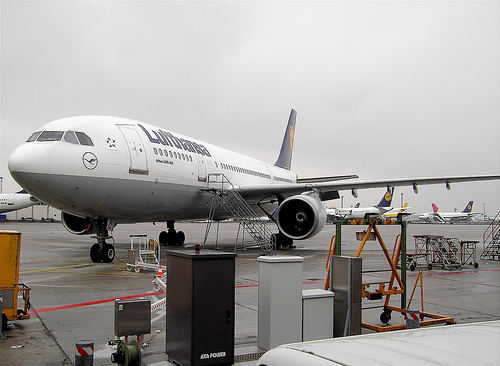

In [12]:
# look at one of the images
img = PILImage.create(path/image_subpath)
img

In [13]:
# function to return the value corresponding with a key in a list of dictionaries
def get_category(in_key_value,in_key,out_key,dict_list):
    return([cat[out_key] for cat in dict_list if cat[in_key]==in_key_value] )

In [14]:
# exercise os.path.basename
os.path.basename('/storage/data/pascal_2007/train/006635.jpg')

'006635.jpg'

In [15]:
def label_func(x): return get_category(get_category(os.path.basename(x),'file_name','id',images)[0],'image_id','bbox',annotations)

In [16]:
# return the bounding box for a given filename
def get_bbox(filename):
    return np.array(img_bbox_combo[os.path.basename(filename)][0])

In [17]:
# return the label (category) for a given filename
def get_lbl(filename):
    return np.array(img_bbox_combo[os.path.basename(filename)][1],dtype=object)

In [18]:
get_lbl('/storage/data/pascal_2007/train/006635.jpg')

array(['train'], dtype=object)

In [19]:
#get_lbl('/storage/data/pascal_2007/train/003772.jpg')

In [20]:
get_lbl('/storage/data/pascal_2007/train/007911.jpg')


array(['motorbike', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person'], dtype=object)

In [21]:
'''def get_category(in_key_value,in_key,out_key,dict_list):
    return([cat[out_key] for cat in dict_list if cat[in_key]==in_key_value] )'''
file_path = Path('/storage/data/pascal_2007/train/008513.jpg')
get_category(os.path.basename(file_path),'file_name','id',images)


[]

In [22]:
get_image_files(path/'train')

(#5011) [Path('/storage/data/pascal_2007/train/003772.jpg'),Path('/storage/data/pascal_2007/train/006066.jpg'),Path('/storage/data/pascal_2007/train/003767.jpg'),Path('/storage/data/pascal_2007/train/006547.jpg'),Path('/storage/data/pascal_2007/train/008444.jpg'),Path('/storage/data/pascal_2007/train/008024.jpg'),Path('/storage/data/pascal_2007/train/007361.jpg'),Path('/storage/data/pascal_2007/train/002757.jpg'),Path('/storage/data/pascal_2007/train/001341.jpg'),Path('/storage/data/pascal_2007/train/003296.jpg')...]

In [23]:
# str(learn.dls.valid_ds.items[i]).split('/')[-1]
os.path.basename(get_image_files(path/'train')[0])

'003772.jpg'

In [24]:
# return the image files
def get_items(noop):
    return_list = []
    empty_list = []
    # return get_image_files(path/'train')
    # filter the training files and keep only the ones with valid info in the JSON file
    for file_path in get_image_files(path/'train'):
        file_id_list = get_category(os.path.basename(file_path),'file_name','id',images)
        if len(file_id_list) > 0:
            return_list.append(file_path)
        else:
            empty_list.append(file_path)
    print("len(return_list): ",len(return_list))
    print("len(empty_list): ",len(empty_list))
    return(return_list)
        
        

In [25]:
return_list = get_items("junk")

len(return_list):  2501
len(empty_list):  2510


In [26]:
# define a DataBlock object using the get_bbox and get_lbl functions
db = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
#                 get_items=get_image_files,
                 get_items = get_items,               
                 splitter=RandomSplitter(),
                 get_y=[get_lbl],
                 item_tfms = RandomResizedCrop(128, min_scale=0.35),
                 n_inp=1)

In [27]:
# define a dataloders object using the DataBlock object
dls = db.dataloaders(path,bs=32)

len(return_list):  2501
len(empty_list):  2510


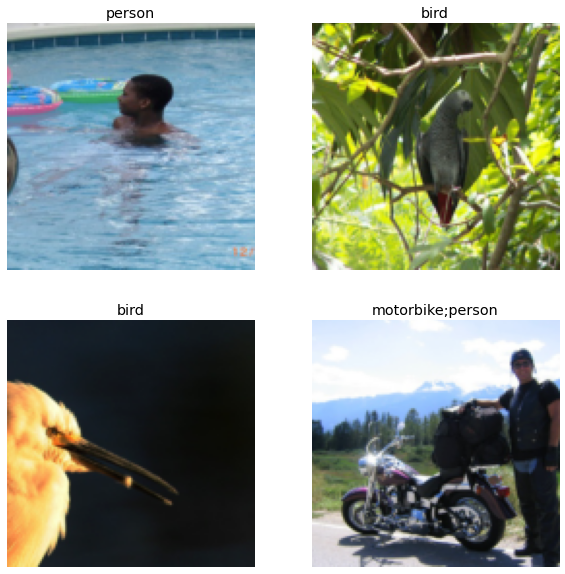

In [92]:
# display a batch to demonstrate the bounding boxes and labels
dls.show_batch(max_n=4, figsize=(10,10))

In [29]:
print("categories ", categories)

categories  [{'supercategory': 'none', 'id': 1, 'name': 'aeroplane'}, {'supercategory': 'none', 'id': 2, 'name': 'bicycle'}, {'supercategory': 'none', 'id': 3, 'name': 'bird'}, {'supercategory': 'none', 'id': 4, 'name': 'boat'}, {'supercategory': 'none', 'id': 5, 'name': 'bottle'}, {'supercategory': 'none', 'id': 6, 'name': 'bus'}, {'supercategory': 'none', 'id': 7, 'name': 'car'}, {'supercategory': 'none', 'id': 8, 'name': 'cat'}, {'supercategory': 'none', 'id': 9, 'name': 'chair'}, {'supercategory': 'none', 'id': 10, 'name': 'cow'}, {'supercategory': 'none', 'id': 11, 'name': 'diningtable'}, {'supercategory': 'none', 'id': 12, 'name': 'dog'}, {'supercategory': 'none', 'id': 13, 'name': 'horse'}, {'supercategory': 'none', 'id': 14, 'name': 'motorbike'}, {'supercategory': 'none', 'id': 15, 'name': 'person'}, {'supercategory': 'none', 'id': 16, 'name': 'pottedplant'}, {'supercategory': 'none', 'id': 17, 'name': 'sheep'}, {'supercategory': 'none', 'id': 18, 'name': 'sofa'}, {'supercatego

In [30]:
print("subset of annotations",list(annotations)[:5])

subset of annotations [{'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]], 'area': 34104, 'iscrowd': 0, 'image_id': 12, 'bbox': [155, 96, 196, 174], 'category_id': 7, 'id': 1, 'ignore': 0}, {'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]], 'area': 13110, 'iscrowd': 0, 'image_id': 17, 'bbox': [184, 61, 95, 138], 'category_id': 15, 'id': 2, 'ignore': 0}, {'segmentation': [[89, 77, 89, 336, 403, 336, 403, 77]], 'area': 81326, 'iscrowd': 0, 'image_id': 17, 'bbox': [89, 77, 314, 259], 'category_id': 13, 'id': 3, 'ignore': 0}, {'segmentation': [[8, 229, 8, 500, 245, 500, 245, 229]], 'area': 64227, 'iscrowd': 0, 'image_id': 23, 'bbox': [8, 229, 237, 271], 'category_id': 2, 'id': 4, 'ignore': 0}, {'segmentation': [[229, 219, 229, 500, 334, 500, 334, 219]], 'area': 29505, 'iscrowd': 0, 'image_id': 23, 'bbox': [229, 219, 105, 281], 'category_id': 2, 'id': 5, 'ignore': 0}]


In [73]:
learn = cnn_learner(dls, resnet18)

 

In [74]:
%%time
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,0.884819,0.566297,00:06


epoch,train_loss,valid_loss,time
0,0.645042,0.468764,00:07
1,0.525170,0.292695,00:07
2,0.345391,0.169345,00:07
3,0.227675,0.133908,00:07
4,0.170412,0.125164,00:07
5,0.143485,0.121822,00:07
6,0.124777,0.117922,00:07
7,0.112895,0.116309,00:07
8,0.105754,0.114826,00:07
9,0.101900,0.115291,00:06


CPU times: user 58 s, sys: 7.82 s, total: 1min 5s
Wall time: 1min 16s


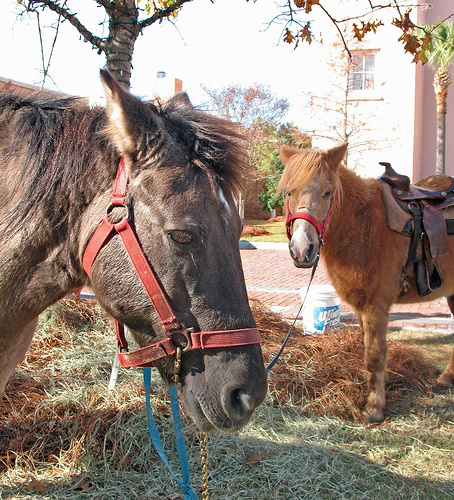

In [75]:
img_test_files = get_image_files(path/"test")
img2 = PILImage.create(img_test_files[100])
img2

In [76]:
learn.predict(img2)

((#2) ['horse','person'],
 TensorImage([False, False, False, False, False, False, False, False, False, False, False, False,  True, False,  True, False, False, False, False, False]),
 TensorImage([0.0063, 0.0181, 0.0064, 0.0180, 0.0075, 0.0054, 0.0129, 0.0060, 0.0070, 0.1775, 0.0049, 0.1072, 0.7462, 0.0092, 0.9763, 0.0029, 0.0028, 0.0231, 0.0240, 0.0031]))

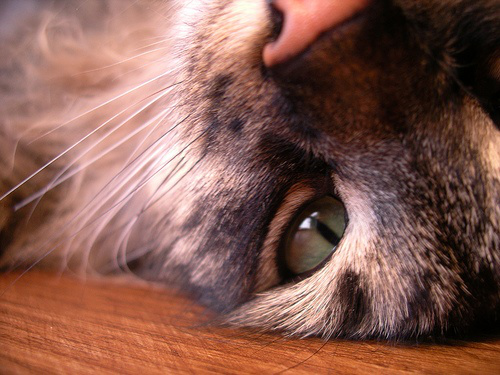

In [77]:
img3 = PILImage.create(img_test_files[200])
img3

In [78]:
learn.predict(img3)

((#1) ['cat'],
 TensorImage([False, False, False, False, False, False, False,  True, False, False, False, False, False, False, False, False, False, False, False, False]),
 TensorImage([2.3023e-03, 4.2443e-03, 6.4584e-02, 9.3151e-04, 9.3106e-03, 2.2161e-03, 1.2497e-03, 7.5214e-01, 9.6559e-04, 4.6457e-02, 1.9106e-03, 5.5875e-04, 7.7903e-02, 2.1974e-03, 8.1898e-03, 4.9052e-03,
         2.3807e-02, 1.4926e-03, 6.9793e-03, 1.6877e-02]))

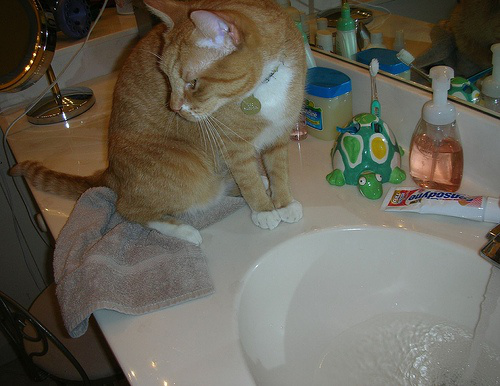

In [83]:
img4 = PILImage.create(img_test_files[120])
img4

In [84]:
learn.predict(img4)

((#2) ['person','sofa'],
 TensorImage([False, False, False, False, False, False, False, False, False, False, False, False, False, False,  True, False, False,  True, False, False]),
 TensorImage([0.0038, 0.0087, 0.0008, 0.0053, 0.0930, 0.0099, 0.0079, 0.2690, 0.3722, 0.0049, 0.1151, 0.2286, 0.0032, 0.0099, 0.6439, 0.0609, 0.0044, 0.5823, 0.0035, 0.0232]))

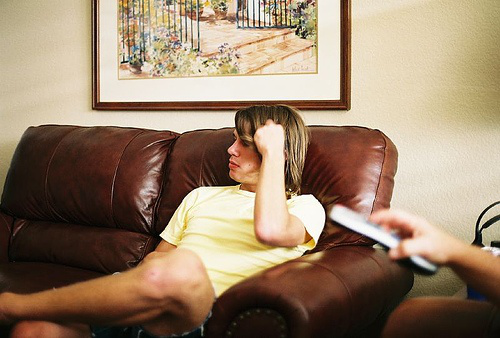

In [85]:
img5 = PILImage.create(img_test_files[150])
img5

In [86]:
learn.predict(img5)

((#1) ['person'],
 TensorImage([False, False, False, False, False, False, False, False, False, False, False, False, False, False,  True, False, False, False, False, False]),
 TensorImage([0.0014, 0.0029, 0.0066, 0.0029, 0.2141, 0.0032, 0.0081, 0.0226, 0.1110, 0.0014, 0.0188, 0.0244, 0.0019, 0.0015, 0.8990, 0.0595, 0.0021, 0.0689, 0.0036, 0.0133]))

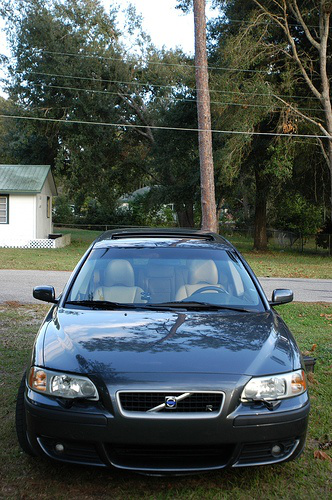

In [87]:
img6 = PILImage.create(img_test_files[900])
img6

In [88]:
learn.predict(img6)

((#1) ['car'],
 TensorImage([False, False, False, False, False, False,  True, False, False, False, False, False, False, False, False, False, False, False, False, False]),
 TensorImage([1.5864e-03, 3.1357e-02, 8.1794e-03, 8.9858e-03, 1.1488e-03, 6.6884e-03, 9.9732e-01, 3.0903e-03, 2.1369e-03, 2.3285e-03, 2.4029e-03, 2.8382e-03, 8.3473e-04, 7.6385e-03, 1.0044e-01, 5.1377e-03,
         3.7357e-03, 5.9456e-03, 8.8138e-03, 1.2625e-03]))

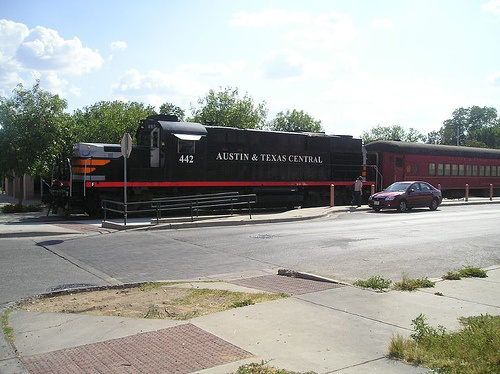

In [89]:
img7 = PILImage.create(img_test_files[950])
img7

In [90]:
learn.predict(img7)

((#1) ['train'],
 TensorImage([False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,  True, False]),
 TensorImage([1.3426e-02, 1.0258e-03, 4.0557e-04, 2.8029e-04, 3.0004e-03, 8.8743e-02, 1.3382e-02, 6.1176e-04, 5.1749e-04, 8.1737e-04, 1.7483e-03, 7.6453e-04, 5.3817e-04, 6.8953e-04, 4.1117e-02, 4.4780e-03,
         6.8736e-04, 1.1432e-03, 9.8693e-01, 5.4537e-03]))

In [91]:
img_test_files[950]

Path('/storage/data/pascal_2007/test/001935.jpg')

In [93]:
with open(path/'test.json') as json_file:
    data_test = json.load(json_file)
    # each nested structure is a list of dictionaries
    categories_test = data_test['categories']
    images_test = data_test['images']
    annotations_test = data_test['annotations'] 

In [ ]:
'''def get_category(in_key_value,in_key,out_key,dict_list):
    return([cat[out_key] for cat in dict_list if cat[in_key]==in_key_value] )'''
get_category()